In [97]:
import pandas as pd
import json

import pandas as pd
import numpy as np
import datetime
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

import datetime
from time import strftime

In [98]:
import json
import pandas as pd

df3=pd.read_csv("boulder_gov_dataset.csv")

In [99]:
df3

,ObjectId,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,BOULDER / CARPENTER PARK2,1505 30th St,Boulder,Colorado,80303,5/24/2021 11:06,MDT,5/24/2021 11:51,MDT,0:44:48,0:44:30,4.460,3.167,0.560,Level 2
25573,25574,COMM VITALITY / 1500PEARL2,1500 Pearl St,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 14:00,MDT,2:28:30,2:28:10,15.173,10.773,1.904,Level 2
25574,25575,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 13:47,MDT,2:15:32,2:15:04,14.896,10.576,1.869,Level 2
25575,25576,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,5/24/2021 11:55,MDT,5/24/2021 13:42,MDT,1:46:48,1:46:32,5.914,4.199,0.742,Level 2


In [100]:
df3.columns

Index(['ObjectId', 'Station_Name', 'Address', 'City', 'State_Province',
       'Zip_Postal_Code', 'Start_Date___Time', 'Start_Time_Zone',
       'End_Date___Time', 'End_Time_Zone', 'Total_Duration__hh_mm_ss_',
       'Charging_Time__hh_mm_ss_', 'Energy__kWh_', 'GHG_Savings__kg_',
       'Gasoline_Savings__gallons_', 'Port_Type'],
      dtype='object')

In [101]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25577 entries, 0 to 25576
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ObjectId                    25577 non-null  int64  
 1   Station_Name                25577 non-null  object 
 2   Address                     25577 non-null  object 
 3   City                        25577 non-null  object 
 4   State_Province              25577 non-null  object 
 5   Zip_Postal_Code             25577 non-null  int64  
 6   Start_Date___Time           25577 non-null  object 
 7   Start_Time_Zone             25577 non-null  object 
 8   End_Date___Time             25576 non-null  object 
 9   End_Time_Zone               25577 non-null  object 
 10  Total_Duration__hh_mm_ss_   25577 non-null  object 
 11  Charging_Time__hh_mm_ss_    25577 non-null  object 
 12  Energy__kWh_                25577 non-null  float64
 13  GHG_Savings__kg_            255

In [102]:
df3.isnull().sum()

ObjectId                      0
Station_Name                  0
Address                       0
City                          0
State_Province                0
Zip_Postal_Code               0
Start_Date___Time             0
Start_Time_Zone               0
End_Date___Time               1
End_Time_Zone                 0
Total_Duration__hh_mm_ss_     0
Charging_Time__hh_mm_ss_      0
Energy__kWh_                  0
GHG_Savings__kg_              0
Gasoline_Savings__gallons_    0
Port_Type                     0
dtype: int64

In [103]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25577 entries, 0 to 25576
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ObjectId                    25577 non-null  int64  
 1   Station_Name                25577 non-null  object 
 2   Address                     25577 non-null  object 
 3   City                        25577 non-null  object 
 4   State_Province              25577 non-null  object 
 5   Zip_Postal_Code             25577 non-null  int64  
 6   Start_Date___Time           25577 non-null  object 
 7   Start_Time_Zone             25577 non-null  object 
 8   End_Date___Time             25576 non-null  object 
 9   End_Time_Zone               25577 non-null  object 
 10  Total_Duration__hh_mm_ss_   25577 non-null  object 
 11  Charging_Time__hh_mm_ss_    25577 non-null  object 
 12  Energy__kWh_                25577 non-null  float64
 13  GHG_Savings__kg_            255

c:\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


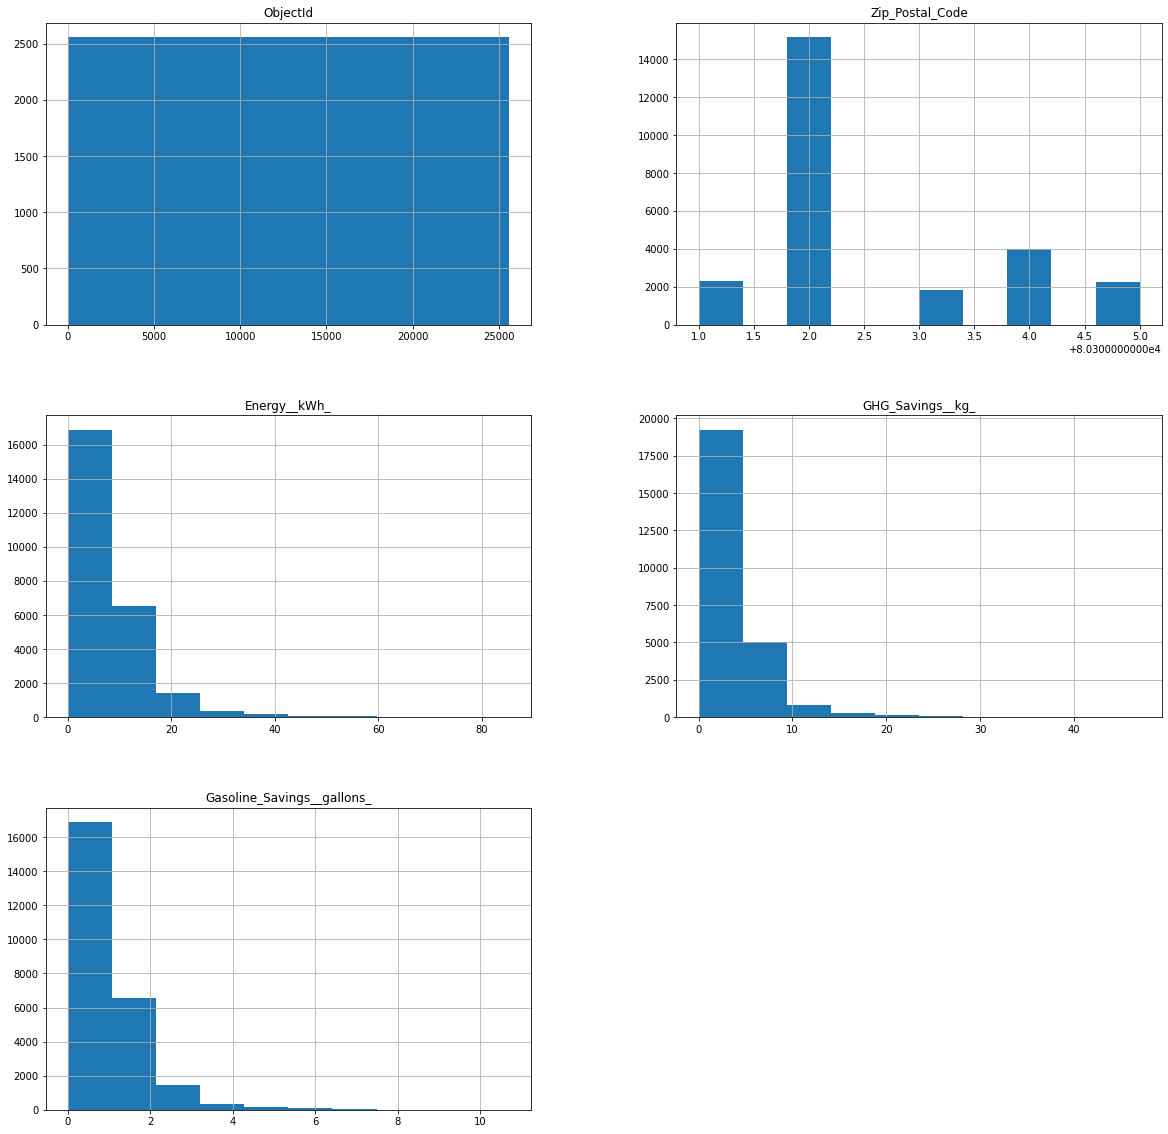

In [104]:
p = df3.hist(figsize = (20,20))

In [105]:
df3

,ObjectId,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,BOULDER / CARPENTER PARK2,1505 30th St,Boulder,Colorado,80303,5/24/2021 11:06,MDT,5/24/2021 11:51,MDT,0:44:48,0:44:30,4.460,3.167,0.560,Level 2
25573,25574,COMM VITALITY / 1500PEARL2,1500 Pearl St,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 14:00,MDT,2:28:30,2:28:10,15.173,10.773,1.904,Level 2
25574,25575,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 13:47,MDT,2:15:32,2:15:04,14.896,10.576,1.869,Level 2
25575,25576,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,5/24/2021 11:55,MDT,5/24/2021 13:42,MDT,1:46:48,1:46:32,5.914,4.199,0.742,Level 2


In [106]:
# max charging time
df3['Charging_Time__hh_mm_ss_'].max()


'9:56:12'

In [107]:
# min charging time
df3['Charging_Time__hh_mm_ss_'].min()


'0:00:00'

In [108]:
# max kwh
df3['Energy__kWh_'].max()


85.2

In [109]:
# min kwh
df3['Energy__kWh_'].min()


0.0

In [110]:
df3

,ObjectId,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,BOULDER / CARPENTER PARK2,1505 30th St,Boulder,Colorado,80303,5/24/2021 11:06,MDT,5/24/2021 11:51,MDT,0:44:48,0:44:30,4.460,3.167,0.560,Level 2
25573,25574,COMM VITALITY / 1500PEARL2,1500 Pearl St,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 14:00,MDT,2:28:30,2:28:10,15.173,10.773,1.904,Level 2
25574,25575,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 13:47,MDT,2:15:32,2:15:04,14.896,10.576,1.869,Level 2
25575,25576,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,5/24/2021 11:55,MDT,5/24/2021 13:42,MDT,1:46:48,1:46:32,5.914,4.199,0.742,Level 2


In [111]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25577 entries, 0 to 25576
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ObjectId                    25577 non-null  int64  
 1   Station_Name                25577 non-null  object 
 2   Address                     25577 non-null  object 
 3   City                        25577 non-null  object 
 4   State_Province              25577 non-null  object 
 5   Zip_Postal_Code             25577 non-null  int64  
 6   Start_Date___Time           25577 non-null  object 
 7   Start_Time_Zone             25577 non-null  object 
 8   End_Date___Time             25576 non-null  object 
 9   End_Time_Zone               25577 non-null  object 
 10  Total_Duration__hh_mm_ss_   25577 non-null  object 
 11  Charging_Time__hh_mm_ss_    25577 non-null  object 
 12  Energy__kWh_                25577 non-null  float64
 13  GHG_Savings__kg_            255

In [112]:
df3

,ObjectId,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,BOULDER / CARPENTER PARK2,1505 30th St,Boulder,Colorado,80303,5/24/2021 11:06,MDT,5/24/2021 11:51,MDT,0:44:48,0:44:30,4.460,3.167,0.560,Level 2
25573,25574,COMM VITALITY / 1500PEARL2,1500 Pearl St,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 14:00,MDT,2:28:30,2:28:10,15.173,10.773,1.904,Level 2
25574,25575,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 13:47,MDT,2:15:32,2:15:04,14.896,10.576,1.869,Level 2
25575,25576,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,5/24/2021 11:55,MDT,5/24/2021 13:42,MDT,1:46:48,1:46:32,5.914,4.199,0.742,Level 2


In [113]:
bins = [0,5, 10,15, 20,25, 30,35, 40,45, 50,55, 60,65, 70, 75,80,85, 90]
df3['binned_energy'] = pd.cut(df3['Energy__kWh_'], bins)


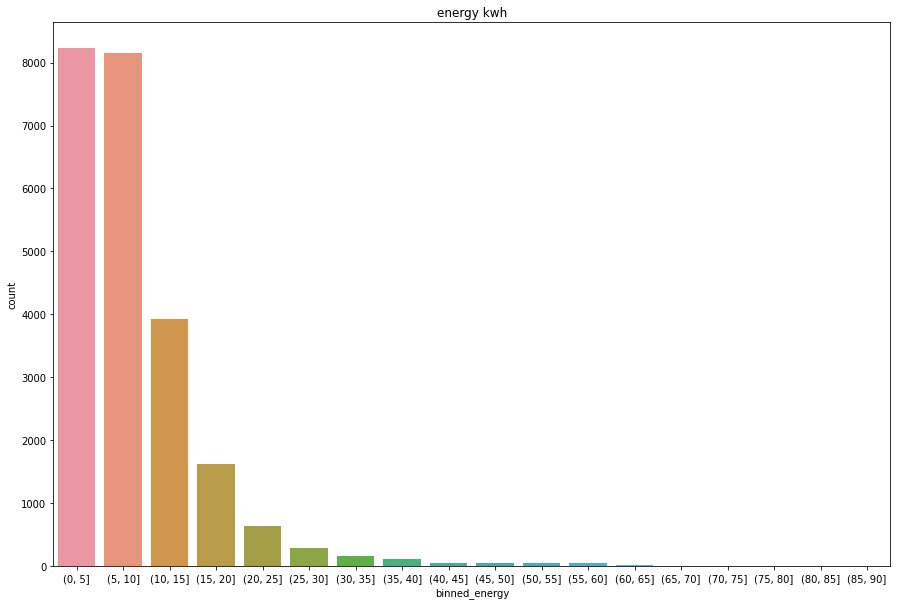

energy binned

binned_energy
(0, 5]      8229
(5, 10]     8149
(10, 15]    3926
(15, 20]    1618
(20, 25]     638
(25, 30]     278
(30, 35]     164
(35, 40]     110
(40, 45]      51
(45, 50]      51
(50, 55]      48
(55, 60]      40
(60, 65]      12
(65, 70]       5
(70, 75]       2
(75, 80]       0
(80, 85]       0
(85, 90]       1
dtype: int64


In [114]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df3.binned_energy, data=df3)
ax.set_title("energy kwh")
plt.show()
print("energy binned\n")
print(df3.groupby(['binned_energy']).size())

In [115]:
df3

,ObjectId,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,binned_energy
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,"(5, 10]"
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,"(0, 5]"
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,"(15, 20]"
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,"(5, 10]"
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2,"(0, 5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,BOULDER / CARPENTER PARK2,1505 30th St,Boulder,Colorado,80303,5/24/2021 11:06,MDT,5/24/2021 11:51,MDT,0:44:48,0:44:30,4.460,3.167,0.560,Level 2,"(0, 5]"
25573,25574,COMM VITALITY / 1500PEARL2,1500 Pearl St,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 14:00,MDT,2:28:30,2:28:10,15.173,10.773,1.904,Level 2,"(15, 20]"
25574,25575,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 13:47,MDT,2:15:32,2:15:04,14.896,10.576,1.869,Level 2,"(10, 15]"
25575,25576,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,5/24/2021 11:55,MDT,5/24/2021 13:42,MDT,1:46:48,1:46:32,5.914,4.199,0.742,Level 2,"(5, 10]"


In [116]:
# Print Unique Values of columns

print("Unique Values in `Station_Name` => {}".format(df3['Station_Name'].unique()))
print('\n')

Unique Values in `Station_Name` => ['BOULDER / JUNCTION ST1' 'BOULDER / ALPINE ST1' 'BOULDER / BASELINE ST1'
 'BOULDER / FACILITIES ST1' 'COMM VITALITY / 1500PEARL2'
 'BOULDER / ATRIUM ST1' 'BOULDER / REC CENTER ST1'
 'BOULDER / REC CENTER ST2' 'COMM VITALITY / 1500PEARL1'
 'COMM VITALITY / 1104 SPRUCE1' 'COMM VITALITY / 1000WALNUT2'
 'COMM VITALITY / 1000WALNUT1' 'COMM VITALITY / 1400 WALNUT1'
 'COMM VITALITY / 1100WALNUT1' 'COMM VITALITY / BOULDER JCTN'
 'BOULDER / ANNEX ST1' 'BOULDER / N BOULDER REC 1'
 'BOULDER / BOULDER PARK S2' 'BOULDER / BOULDER PARK S1'
 'COMM VITALITY / 2200 BROADWAY1' 'BOULDER / EAST REC'
 'BOULDERJUNCTION / JUNCTION ST1' 'BOULDER / RESERVOIR ST1'
 'BOULDER / RESERVOIR ST2' 'BOULDER / CARPENTER PARK1'
 'BOULDER / CARPENTER PARK2' 'BOULDER / AIRPORT ST1']




In [117]:
# Print Unique Values of columns

print("Unique Values in `Address` => {}".format(df3['Address'].unique()))
print('\n')

Unique Values in `Address` => ['2280 Junction Pl' '1275 Alpine Ave' '900 Baseline Rd' '1745 14th street'
 '1500 Pearl St' '1770 13th St' '1360 Gillaspie Dr' '1100 Spruce St'
 '900 Walnut St' '1400 Walnut St' '1100 Walnut' '2052 Junction Pl'
 '7315 Red Deer Dr' '3172 Broadway' '1739 Broadway' '2150 13th St'
 '5660 Sioux Dr' '5565 51st St' '1505 30th St' '3335 Airport Rd']




In [118]:
# Print Unique Values of columns

print("Unique Values in `City` => {}".format(df3['City'].unique()))
print('\n')

Unique Values in `City` => ['Boulder']




In [119]:
# Print Unique Values of columns

print("Unique Values in `State_Province` => {}".format(df3['State_Province'].unique()))
print('\n')

Unique Values in `State_Province` => ['Colorado']




In [120]:
# Print Unique Values of columns

print("Unique Values in `Zip_Postal_Code` => {}".format(df3['Zip_Postal_Code'].unique()))
print('\n')

Unique Values in `Zip_Postal_Code` => [80301 80304 80302 80305 80303]




In [121]:
# Print Unique Values of columns

print("Unique Values in `Start_Time_Zone` => {}".format(df3['Start_Time_Zone'].unique()))
print('\n')

Unique Values in `Start_Time_Zone` => ['MDT']




In [122]:
# Print Unique Values of columns

print("Unique Values in `End_Time_Zone` => {}".format(df3['End_Time_Zone'].unique()))
print('\n')

Unique Values in `End_Time_Zone` => ['MDT']




In [123]:
# Print Unique Values of columns

print("Unique Values in `Port_Type` => {}".format(df3['Port_Type'].unique()))
print('\n')

Unique Values in `Port_Type` => ['Level 2']




In [124]:
# get tme and date from timestamp
df3['Charge_start_timestamp'] = pd.to_datetime(df3['Start_Date___Time'])
df3['Start_date'] = df3['Charge_start_timestamp'].dt.date

df3['Start_date_month'] = df3['Charge_start_timestamp'].dt.month
df3['Start_date_day'] = df3['Charge_start_timestamp'].dt.day
df3['Start_date_year'] = df3['Charge_start_timestamp'].dt.year
df3['startdayOfWeek'] = df3['Charge_start_timestamp'].dt.dayofweek
df3['startdayOfWeekname'] = df3['Charge_start_timestamp'].dt.day_name()


df3['Start_time'] = df3['Charge_start_timestamp'].dt.time

time1 = pd.DatetimeIndex(df3['Charge_start_timestamp'])
df3['start_time_in_minutes']=time1.hour * 60 + time1.minute





In [125]:
# get tme and date from timestamp
df3['Charge_end_timestamp'] = pd.to_datetime(df3['End_Date___Time'])
df3['End_date'] = df3['Charge_end_timestamp'].dt.date

df3['End_date_month'] = df3['Charge_end_timestamp'].dt.month
df3['End_date_day'] = df3['Charge_end_timestamp'].dt.day
df3['End_date_year'] = df3['Charge_end_timestamp'].dt.year
df3['enddayOfWeek'] = df3['Charge_end_timestamp'].dt.dayofweek
df3['enddayOfWeekname'] = df3['Charge_end_timestamp'].dt.day_name()


df3['End_time'] = df3['Charge_end_timestamp'].dt.time

#time2 = pd.DatetimeIndex(df3['Charge_end_timestamp'])
#df3['end_time_in_minutes']=time2.hour * 60 + time2.minute



In [126]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25577 entries, 0 to 25576
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ObjectId                    25577 non-null  int64         
 1   Station_Name                25577 non-null  object        
 2   Address                     25577 non-null  object        
 3   City                        25577 non-null  object        
 4   State_Province              25577 non-null  object        
 5   Zip_Postal_Code             25577 non-null  int64         
 6   Start_Date___Time           25577 non-null  object        
 7   Start_Time_Zone             25577 non-null  object        
 8   End_Date___Time             25576 non-null  object        
 9   End_Time_Zone               25577 non-null  object        
 10  Total_Duration__hh_mm_ss_   25577 non-null  object        
 11  Charging_Time__hh_mm_ss_    25577 non-null  object    

In [127]:
df3

,ObjectId,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,...,Start_time,start_time_in_minutes,Charge_end_timestamp,End_date,End_date_month,End_date_day,End_date_year,enddayOfWeek,enddayOfWeekname,End_time
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,...,17:49:00,1069,2018-01-01 19:52:00,2018-01-01,1.0,1.0,2018.0,0.0,Monday,19:52:00
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,...,08:52:00,532,2018-01-02 09:16:00,2018-01-02,1.0,2.0,2018.0,1.0,Tuesday,09:16:00
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,...,21:11:00,1271,2018-01-03 06:23:00,2018-01-03,1.0,3.0,2018.0,2.0,Wednesday,06:23:00
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,...,09:19:00,559,2018-01-03 11:14:00,2018-01-03,1.0,3.0,2018.0,2.0,Wednesday,11:14:00
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,...,14:13:00,853,2018-01-03 14:30:00,2018-01-03,1.0,3.0,2018.0,2.0,Wednesday,14:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,BOULDER / CARPENTER PARK2,1505 30th St,Boulder,Colorado,80303,5/24/2021 11:06,MDT,5/24/2021 11:51,MDT,...,11:06:00,666,2021-05-24 11:51:00,2021-05-24,5.0,24.0,2021.0,0.0,Monday,11:51:00
25573,25574,COMM VITALITY / 1500PEARL2,1500 Pearl St,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 14:00,MDT,...,11:31:00,691,2021-05-24 14:00:00,2021-05-24,5.0,24.0,2021.0,0.0,Monday,14:00:00
25574,25575,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 13:47,MDT,...,11:31:00,691,2021-05-24 13:47:00,2021-05-24,5.0,24.0,2021.0,0.0,Monday,13:47:00
25575,25576,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,5/24/2021 11:55,MDT,5/24/2021 13:42,MDT,...,11:55:00,715,2021-05-24 13:42:00,2021-05-24,5.0,24.0,2021.0,0.0,Monday,13:42:00


In [128]:
newdf=df3.drop(columns=['Station_Name', 'Address','City','State_Province','Zip_Postal_Code','Start_Date___Time','End_Date___Time','End_Time_Zone','Port_Type','Start_Time_Zone','Start_date','End_date','enddayOfWeekname','startdayOfWeekname','Total_Duration__hh_mm_ss_','Charging_Time__hh_mm_ss_'])

In [129]:
newdf

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,binned_energy,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,start_time_in_minutes,Charge_end_timestamp,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time
0,1,6.504,2.732,0.816,"(5, 10]",2018-01-01 17:49:00,1,1,2018,0,17:49:00,1069,2018-01-01 19:52:00,1.0,1.0,2018.0,0.0,19:52:00
1,2,2.481,1.042,0.311,"(0, 5]",2018-01-02 08:52:00,1,2,2018,1,08:52:00,532,2018-01-02 09:16:00,1.0,2.0,2018.0,1.0,09:16:00
2,3,15.046,6.319,1.888,"(15, 20]",2018-01-02 21:11:00,1,2,2018,1,21:11:00,1271,2018-01-03 06:23:00,1.0,3.0,2018.0,2.0,06:23:00
3,4,6.947,2.918,0.872,"(5, 10]",2018-01-03 09:19:00,1,3,2018,2,09:19:00,559,2018-01-03 11:14:00,1.0,3.0,2018.0,2.0,11:14:00
4,5,1.800,0.756,0.226,"(0, 5]",2018-01-03 14:13:00,1,3,2018,2,14:13:00,853,2018-01-03 14:30:00,1.0,3.0,2018.0,2.0,14:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,4.460,3.167,0.560,"(0, 5]",2021-05-24 11:06:00,5,24,2021,0,11:06:00,666,2021-05-24 11:51:00,5.0,24.0,2021.0,0.0,11:51:00
25573,25574,15.173,10.773,1.904,"(15, 20]",2021-05-24 11:31:00,5,24,2021,0,11:31:00,691,2021-05-24 14:00:00,5.0,24.0,2021.0,0.0,14:00:00
25574,25575,14.896,10.576,1.869,"(10, 15]",2021-05-24 11:31:00,5,24,2021,0,11:31:00,691,2021-05-24 13:47:00,5.0,24.0,2021.0,0.0,13:47:00
25575,25576,5.914,4.199,0.742,"(5, 10]",2021-05-24 11:55:00,5,24,2021,0,11:55:00,715,2021-05-24 13:42:00,5.0,24.0,2021.0,0.0,13:42:00


In [130]:
newdf['charge_duration_in_minutes']=(newdf.Charge_end_timestamp-newdf.Charge_start_timestamp).astype('timedelta64[m]')

In [131]:
newdf

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,binned_energy,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,start_time_in_minutes,Charge_end_timestamp,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,charge_duration_in_minutes
0,1,6.504,2.732,0.816,"(5, 10]",2018-01-01 17:49:00,1,1,2018,0,17:49:00,1069,2018-01-01 19:52:00,1.0,1.0,2018.0,0.0,19:52:00,123.0
1,2,2.481,1.042,0.311,"(0, 5]",2018-01-02 08:52:00,1,2,2018,1,08:52:00,532,2018-01-02 09:16:00,1.0,2.0,2018.0,1.0,09:16:00,24.0
2,3,15.046,6.319,1.888,"(15, 20]",2018-01-02 21:11:00,1,2,2018,1,21:11:00,1271,2018-01-03 06:23:00,1.0,3.0,2018.0,2.0,06:23:00,552.0
3,4,6.947,2.918,0.872,"(5, 10]",2018-01-03 09:19:00,1,3,2018,2,09:19:00,559,2018-01-03 11:14:00,1.0,3.0,2018.0,2.0,11:14:00,115.0
4,5,1.800,0.756,0.226,"(0, 5]",2018-01-03 14:13:00,1,3,2018,2,14:13:00,853,2018-01-03 14:30:00,1.0,3.0,2018.0,2.0,14:30:00,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,4.460,3.167,0.560,"(0, 5]",2021-05-24 11:06:00,5,24,2021,0,11:06:00,666,2021-05-24 11:51:00,5.0,24.0,2021.0,0.0,11:51:00,45.0
25573,25574,15.173,10.773,1.904,"(15, 20]",2021-05-24 11:31:00,5,24,2021,0,11:31:00,691,2021-05-24 14:00:00,5.0,24.0,2021.0,0.0,14:00:00,149.0
25574,25575,14.896,10.576,1.869,"(10, 15]",2021-05-24 11:31:00,5,24,2021,0,11:31:00,691,2021-05-24 13:47:00,5.0,24.0,2021.0,0.0,13:47:00,136.0
25575,25576,5.914,4.199,0.742,"(5, 10]",2021-05-24 11:55:00,5,24,2021,0,11:55:00,715,2021-05-24 13:42:00,5.0,24.0,2021.0,0.0,13:42:00,107.0


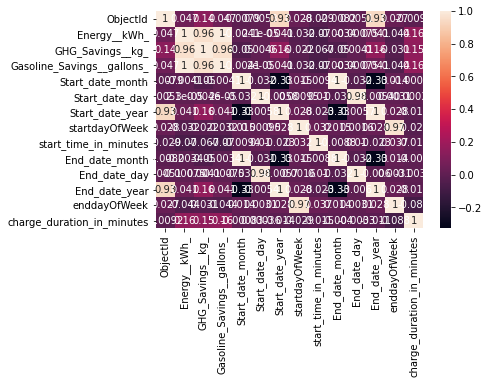

In [132]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = newdf.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

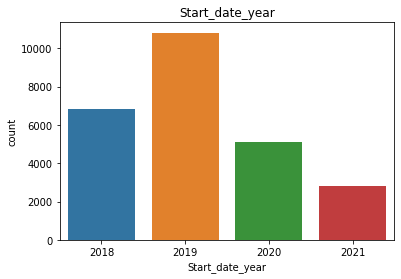

Start_date_year

Start_date_year
2018     6855
2019    10812
2020     5101
2021     2809
dtype: int64


In [133]:
ax = sns.countplot(x=newdf.Start_date_year, data=newdf)
ax.set_title("Start_date_year")
plt.show()
print("Start_date_year\n")
print(newdf.groupby(['Start_date_year']).size())

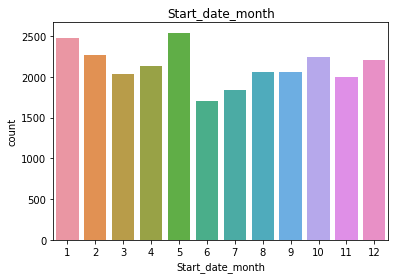

Start_date_month

Start_date_month
1     2475
2     2265
3     2040
4     2134
5     2543
6     1711
7     1837
8     2060
9     2059
10    2244
11    2005
12    2204
dtype: int64


In [134]:
ax = sns.countplot(x=newdf.Start_date_month, data=newdf)
ax.set_title("Start_date_month")
plt.show()
print("Start_date_month\n")
print(newdf.groupby(['Start_date_month']).size())

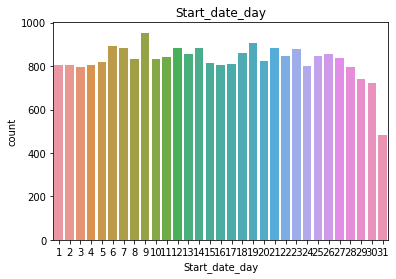

Start_date_day

Start_date_day
1     803
2     805
3     795
4     807
5     819
6     890
7     882
8     834
9     953
10    832
11    840
12    882
13    854
14    881
15    812
16    805
17    808
18    858
19    908
20    823
21    883
22    848
23    877
24    799
25    844
26    857
27    837
28    797
29    741
30    722
31    481
dtype: int64


In [135]:
ax = sns.countplot(x=newdf.Start_date_day, data=newdf)
ax.set_title("Start_date_day")
plt.show()
print("Start_date_day\n")
print(newdf.groupby(['Start_date_day']).size())

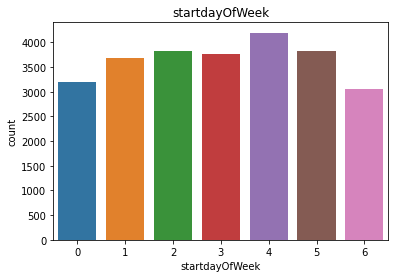

startdayOfWeek

startdayOfWeek
0    3207
1    3682
2    3830
3    3764
4    4198
5    3837
6    3059
dtype: int64


In [136]:
ax = sns.countplot(x=newdf.startdayOfWeek, data=newdf)
ax.set_title("startdayOfWeek")
plt.show()
print("startdayOfWeek\n")
print(newdf.groupby(['startdayOfWeek']).size())

In [137]:
# max charging duration
newdf['charge_duration_in_minutes'].max()


28183.0

In [138]:
# min charging duration
newdf['charge_duration_in_minutes'].min()


0.0

In [139]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 28183]
newdf['binned_duration_in_minutes'] = pd.cut(newdf['charge_duration_in_minutes'], bins)



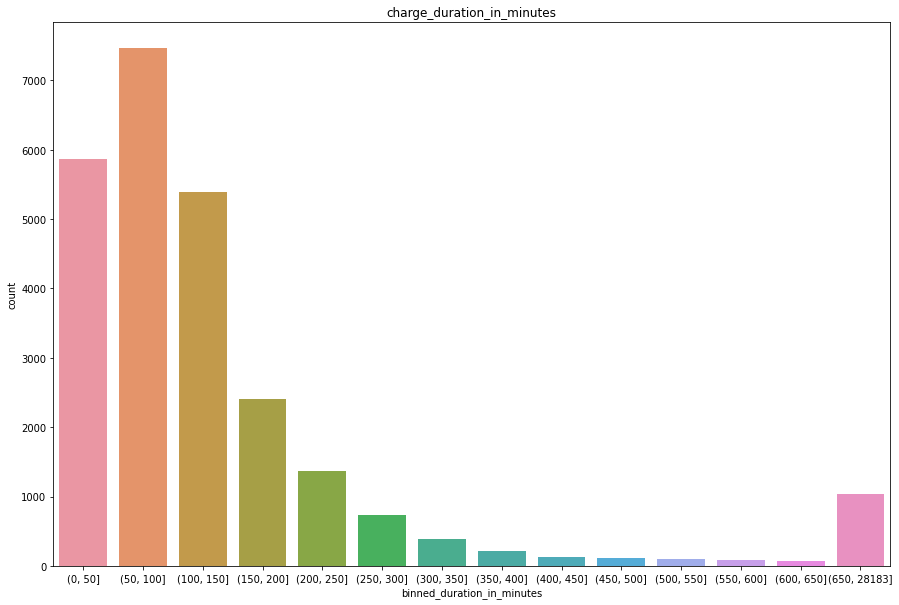

binned_duration_in_minutes

binned_duration_in_minutes
(0, 50]         5863
(50, 100]       7464
(100, 150]      5396
(150, 200]      2399
(200, 250]      1365
(250, 300]       740
(300, 350]       384
(350, 400]       220
(400, 450]       126
(450, 500]       121
(500, 550]        97
(550, 600]        84
(600, 650]        67
(650, 28183]    1035
dtype: int64


In [140]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=newdf.binned_duration_in_minutes, data=newdf)
ax.set_title("charge_duration_in_minutes")
plt.show()
print("binned_duration_in_minutes\n")
print(newdf.groupby(['binned_duration_in_minutes']).size())

In [141]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25577 entries, 0 to 25576
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ObjectId                    25577 non-null  int64         
 1   Energy__kWh_                25577 non-null  float64       
 2   GHG_Savings__kg_            25577 non-null  float64       
 3   Gasoline_Savings__gallons_  25577 non-null  float64       
 4   binned_energy               23322 non-null  category      
 5   Charge_start_timestamp      25577 non-null  datetime64[ns]
 6   Start_date_month            25577 non-null  int64         
 7   Start_date_day              25577 non-null  int64         
 8   Start_date_year             25577 non-null  int64         
 9   startdayOfWeek              25577 non-null  int64         
 10  Start_time                  25577 non-null  object        
 11  start_time_in_minutes       25577 non-null  int64     

In [142]:
newdf1=newdf.drop(columns=['Charge_start_timestamp','Charge_end_timestamp','Start_time','End_time','binned_energy'])

In [143]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25577 entries, 0 to 25576
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ObjectId                    25577 non-null  int64   
 1   Energy__kWh_                25577 non-null  float64 
 2   GHG_Savings__kg_            25577 non-null  float64 
 3   Gasoline_Savings__gallons_  25577 non-null  float64 
 4   Start_date_month            25577 non-null  int64   
 5   Start_date_day              25577 non-null  int64   
 6   Start_date_year             25577 non-null  int64   
 7   startdayOfWeek              25577 non-null  int64   
 8   start_time_in_minutes       25577 non-null  int64   
 9   End_date_month              25576 non-null  float64 
 10  End_date_day                25576 non-null  float64 
 11  End_date_year               25576 non-null  float64 
 12  enddayOfWeek                25576 non-null  float64 
 13  charge_duration_

In [144]:
newdf1.isnull().sum()

ObjectId                        0
Energy__kWh_                    0
GHG_Savings__kg_                0
Gasoline_Savings__gallons_      0
Start_date_month                0
Start_date_day                  0
Start_date_year                 0
startdayOfWeek                  0
start_time_in_minutes           0
End_date_month                  1
End_date_day                    1
End_date_year                   1
enddayOfWeek                    1
charge_duration_in_minutes      1
binned_duration_in_minutes    216
dtype: int64

In [145]:
newdf1 = newdf1.dropna()

In [146]:
newdf1.isnull().sum()

ObjectId                      0
Energy__kWh_                  0
GHG_Savings__kg_              0
Gasoline_Savings__gallons_    0
Start_date_month              0
Start_date_day                0
Start_date_year               0
startdayOfWeek                0
start_time_in_minutes         0
End_date_month                0
End_date_day                  0
End_date_year                 0
enddayOfWeek                  0
charge_duration_in_minutes    0
binned_duration_in_minutes    0
dtype: int64

In [147]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25361 entries, 0 to 25576
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ObjectId                    25361 non-null  int64   
 1   Energy__kWh_                25361 non-null  float64 
 2   GHG_Savings__kg_            25361 non-null  float64 
 3   Gasoline_Savings__gallons_  25361 non-null  float64 
 4   Start_date_month            25361 non-null  int64   
 5   Start_date_day              25361 non-null  int64   
 6   Start_date_year             25361 non-null  int64   
 7   startdayOfWeek              25361 non-null  int64   
 8   start_time_in_minutes       25361 non-null  int64   
 9   End_date_month              25361 non-null  float64 
 10  End_date_day                25361 non-null  float64 
 11  End_date_year               25361 non-null  float64 
 12  enddayOfWeek                25361 non-null  float64 
 13  charge_duration_

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [149]:
#X=newdf1.drop('Energy__kWh_',axis=1)
#y=newdf1['Energy__kWh_']  # Labels

X = newdf1.iloc[:, :-1].values
y = newdf1.iloc[:, 12].values

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [153]:
y_pred = classifier.predict(X_test)

In [154]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[607  17   1   0   0   0   0]
 [ 53 662  25   1   0   0   0]
 [  2  56 708  19   2   0   0]
 [  0   5  47 673  20   0   0]
 [  0   1   4  57 764  14   1]
 [  0   0   1   3  31 669  13]
 [  0   0   0   0   4  72 541]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       625
         1.0       0.89      0.89      0.89       741
         2.0       0.90      0.90      0.90       787
         3.0       0.89      0.90      0.90       745
         4.0       0.93      0.91      0.92       841
         5.0       0.89      0.93      0.91       717
         6.0       0.97      0.88      0.92       617

    accuracy                           0.91      5073
   macro avg       0.91      0.91      0.91      5073
weighted avg       0.91      0.91      0.91      5073



In [155]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

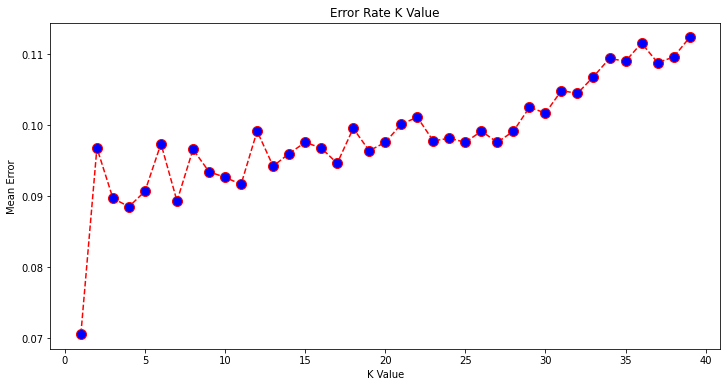

In [156]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [157]:
newdf1.head()

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,start_time_in_minutes,End_date_month,End_date_day,End_date_year,enddayOfWeek,charge_duration_in_minutes,binned_duration_in_minutes
0,1,6.504,2.732,0.816,1,1,2018,0,1069,1.0,1.0,2018.0,0.0,123.0,"(100, 150]"
1,2,2.481,1.042,0.311,1,2,2018,1,532,1.0,2.0,2018.0,1.0,24.0,"(0, 50]"
2,3,15.046,6.319,1.888,1,2,2018,1,1271,1.0,3.0,2018.0,2.0,552.0,"(550, 600]"
3,4,6.947,2.918,0.872,1,3,2018,2,559,1.0,3.0,2018.0,2.0,115.0,"(100, 150]"
4,5,1.800,0.756,0.226,1,3,2018,2,853,1.0,3.0,2018.0,2.0,17.0,"(0, 50]"


In [158]:
newdf.head()

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,binned_energy,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,start_time_in_minutes,Charge_end_timestamp,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,charge_duration_in_minutes,binned_duration_in_minutes
0,1,6.504,2.732,0.816,"(5, 10]",2018-01-01 17:49:00,1,1,2018,0,17:49:00,1069,2018-01-01 19:52:00,1.0,1.0,2018.0,0.0,19:52:00,123.0,"(100, 150]"
1,2,2.481,1.042,0.311,"(0, 5]",2018-01-02 08:52:00,1,2,2018,1,08:52:00,532,2018-01-02 09:16:00,1.0,2.0,2018.0,1.0,09:16:00,24.0,"(0, 50]"
2,3,15.046,6.319,1.888,"(15, 20]",2018-01-02 21:11:00,1,2,2018,1,21:11:00,1271,2018-01-03 06:23:00,1.0,3.0,2018.0,2.0,06:23:00,552.0,"(550, 600]"
3,4,6.947,2.918,0.872,"(5, 10]",2018-01-03 09:19:00,1,3,2018,2,09:19:00,559,2018-01-03 11:14:00,1.0,3.0,2018.0,2.0,11:14:00,115.0,"(100, 150]"
4,5,1.800,0.756,0.226,"(0, 5]",2018-01-03 14:13:00,1,3,2018,2,14:13:00,853,2018-01-03 14:30:00,1.0,3.0,2018.0,2.0,14:30:00,17.0,"(0, 50]"


In [159]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25577 entries, 0 to 25576
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ObjectId                    25577 non-null  int64         
 1   Energy__kWh_                25577 non-null  float64       
 2   GHG_Savings__kg_            25577 non-null  float64       
 3   Gasoline_Savings__gallons_  25577 non-null  float64       
 4   binned_energy               23322 non-null  category      
 5   Charge_start_timestamp      25577 non-null  datetime64[ns]
 6   Start_date_month            25577 non-null  int64         
 7   Start_date_day              25577 non-null  int64         
 8   Start_date_year             25577 non-null  int64         
 9   startdayOfWeek              25577 non-null  int64         
 10  Start_time                  25577 non-null  object        
 11  start_time_in_minutes       25577 non-null  int64     

In [160]:
# gathering all records for month of january
df_jan=newdf[newdf['Start_date_month'] ==1]

In [161]:
df_jan

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,binned_energy,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,start_time_in_minutes,Charge_end_timestamp,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,charge_duration_in_minutes,binned_duration_in_minutes
0,1,6.504,2.732,0.816,"(5, 10]",2018-01-01 17:49:00,1,1,2018,0,17:49:00,1069,2018-01-01 19:52:00,1.0,1.0,2018.0,0.0,19:52:00,123.0,"(100, 150]"
1,2,2.481,1.042,0.311,"(0, 5]",2018-01-02 08:52:00,1,2,2018,1,08:52:00,532,2018-01-02 09:16:00,1.0,2.0,2018.0,1.0,09:16:00,24.0,"(0, 50]"
2,3,15.046,6.319,1.888,"(15, 20]",2018-01-02 21:11:00,1,2,2018,1,21:11:00,1271,2018-01-03 06:23:00,1.0,3.0,2018.0,2.0,06:23:00,552.0,"(550, 600]"
3,4,6.947,2.918,0.872,"(5, 10]",2018-01-03 09:19:00,1,3,2018,2,09:19:00,559,2018-01-03 11:14:00,1.0,3.0,2018.0,2.0,11:14:00,115.0,"(100, 150]"
4,5,1.800,0.756,0.226,"(0, 5]",2018-01-03 14:13:00,1,3,2018,2,14:13:00,853,2018-01-03 14:30:00,1.0,3.0,2018.0,2.0,14:30:00,17.0,"(0, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23195,23196,8.645,3.631,1.085,"(5, 10]",2021-01-22 12:40:00,1,22,2021,4,12:40:00,760,2021-01-22 14:08:00,1.0,22.0,2021.0,4.0,14:08:00,88.0,"(50, 100]"
23196,23197,11.491,4.826,1.442,"(10, 15]",2021-01-22 13:12:00,1,22,2021,4,13:12:00,792,2021-01-22 15:08:00,1.0,22.0,2021.0,4.0,15:08:00,116.0,"(100, 150]"
23197,23198,1.973,0.829,0.248,"(0, 5]",2021-01-22 15:01:00,1,22,2021,4,15:01:00,901,2021-01-22 15:36:00,1.0,22.0,2021.0,4.0,15:36:00,35.0,"(0, 50]"
23198,23199,3.607,1.515,0.453,"(0, 5]",2021-01-22 15:01:00,1,22,2021,4,15:01:00,901,2021-01-22 16:07:00,1.0,22.0,2021.0,4.0,16:07:00,66.0,"(50, 100]"


In [162]:
# gathering all records for january 2018
df_jan_2018=df_jan[df_jan['Start_date_year'] ==2018]

In [163]:
df_jan_2018

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,binned_energy,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,start_time_in_minutes,Charge_end_timestamp,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,charge_duration_in_minutes,binned_duration_in_minutes
0,1,6.504,2.732,0.816,"(5, 10]",2018-01-01 17:49:00,1,1,2018,0,17:49:00,1069,2018-01-01 19:52:00,1.0,1.0,2018.0,0.0,19:52:00,123.0,"(100, 150]"
1,2,2.481,1.042,0.311,"(0, 5]",2018-01-02 08:52:00,1,2,2018,1,08:52:00,532,2018-01-02 09:16:00,1.0,2.0,2018.0,1.0,09:16:00,24.0,"(0, 50]"
2,3,15.046,6.319,1.888,"(15, 20]",2018-01-02 21:11:00,1,2,2018,1,21:11:00,1271,2018-01-03 06:23:00,1.0,3.0,2018.0,2.0,06:23:00,552.0,"(550, 600]"
3,4,6.947,2.918,0.872,"(5, 10]",2018-01-03 09:19:00,1,3,2018,2,09:19:00,559,2018-01-03 11:14:00,1.0,3.0,2018.0,2.0,11:14:00,115.0,"(100, 150]"
4,5,1.800,0.756,0.226,"(0, 5]",2018-01-03 14:13:00,1,3,2018,2,14:13:00,853,2018-01-03 14:30:00,1.0,3.0,2018.0,2.0,14:30:00,17.0,"(0, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,3.800,1.596,0.477,"(0, 5]",2018-01-30 13:53:00,1,30,2018,1,13:53:00,833,2018-01-30 15:24:00,1.0,30.0,2018.0,1.0,15:24:00,91.0,"(50, 100]"
251,252,3.331,1.399,0.418,"(0, 5]",2018-01-30 14:46:00,1,30,2018,1,14:46:00,886,2018-01-30 15:29:00,1.0,30.0,2018.0,1.0,15:29:00,43.0,"(0, 50]"
252,253,5.634,2.366,0.707,"(5, 10]",2018-01-30 16:14:00,1,30,2018,1,16:14:00,974,2018-01-30 17:12:00,1.0,30.0,2018.0,1.0,17:12:00,58.0,"(50, 100]"
253,254,1.295,0.544,0.162,"(0, 5]",2018-01-30 17:48:00,1,30,2018,1,17:48:00,1068,2018-01-30 18:40:00,1.0,30.0,2018.0,1.0,18:40:00,52.0,"(50, 100]"


<AxesSubplot:xlabel='start_time_in_minutes'>

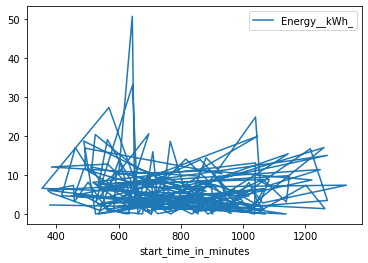

In [164]:
# plot for month of january 2018 / nearly 209 rows
df_jan_2018.plot(x='start_time_in_minutes', y='Energy__kWh_', label='Energy__kWh_') 

In [165]:
# gathering all records for february 
df_feb=newdf[newdf['Start_date_month'] ==2 ]

In [166]:
df_feb

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,binned_energy,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,start_time_in_minutes,Charge_end_timestamp,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,charge_duration_in_minutes,binned_duration_in_minutes
109,110,7.664,3.219,0.962,"(5.0, 10.0]",2018-02-01 07:43:00,2,1,2018,3,07:43:00,463,2018-02-01 11:14:00,2.0,1.0,2018.0,3.0,11:14:00,211.0,"(200, 250]"
110,111,12.089,5.078,1.517,"(10.0, 15.0]",2018-02-01 08:23:00,2,1,2018,3,08:23:00,503,2018-02-01 10:25:00,2.0,1.0,2018.0,3.0,10:25:00,122.0,"(100, 150]"
111,112,4.818,2.023,0.605,"(0.0, 5.0]",2018-02-01 11:14:00,2,1,2018,3,11:14:00,674,2018-02-01 12:01:00,2.0,1.0,2018.0,3.0,12:01:00,47.0,"(0, 50]"
112,113,7.194,3.021,0.903,"(5.0, 10.0]",2018-02-01 11:20:00,2,1,2018,3,11:20:00,680,2018-02-01 14:03:00,2.0,1.0,2018.0,3.0,14:03:00,163.0,"(150, 200]"
113,114,28.961,12.163,3.635,"(25.0, 30.0]",2018-02-01 11:33:00,2,1,2018,3,11:33:00,693,2018-02-01 15:48:00,2.0,1.0,2018.0,3.0,15:48:00,255.0,"(250, 300]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23595,23596,4.219,2.995,0.529,"(0.0, 5.0]",2021-02-21 11:11:00,2,21,2021,6,11:11:00,671,2021-02-21 11:54:00,2.0,21.0,2021.0,6.0,11:54:00,43.0,"(0, 50]"
23596,23597,15.049,10.685,1.889,"(15.0, 20.0]",2021-02-21 11:11:00,2,21,2021,6,11:11:00,671,2021-02-21 15:32:00,2.0,21.0,2021.0,6.0,15:32:00,261.0,"(250, 300]"
23597,23598,0.000,0.000,0.000,NaN,2021-02-21 11:11:00,2,21,2021,6,11:11:00,671,2021-02-21 11:12:00,2.0,21.0,2021.0,6.0,11:12:00,1.0,"(0, 50]"
23598,23599,2.808,1.994,0.352,"(0.0, 5.0]",2021-02-21 11:13:00,2,21,2021,6,11:13:00,673,2021-02-21 11:41:00,2.0,21.0,2021.0,6.0,11:41:00,28.0,"(0, 50]"


In [167]:
# gathering all records for february 2018
df_feb_2018=df_feb[df_feb['Start_date_year'] ==2018 ]

In [168]:
df_feb_2018

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,binned_energy,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,start_time_in_minutes,Charge_end_timestamp,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,charge_duration_in_minutes,binned_duration_in_minutes
109,110,7.664,3.219,0.962,"(5, 10]",2018-02-01 07:43:00,2,1,2018,3,07:43:00,463,2018-02-01 11:14:00,2.0,1.0,2018.0,3.0,11:14:00,211.0,"(200, 250]"
110,111,12.089,5.078,1.517,"(10, 15]",2018-02-01 08:23:00,2,1,2018,3,08:23:00,503,2018-02-01 10:25:00,2.0,1.0,2018.0,3.0,10:25:00,122.0,"(100, 150]"
111,112,4.818,2.023,0.605,"(0, 5]",2018-02-01 11:14:00,2,1,2018,3,11:14:00,674,2018-02-01 12:01:00,2.0,1.0,2018.0,3.0,12:01:00,47.0,"(0, 50]"
112,113,7.194,3.021,0.903,"(5, 10]",2018-02-01 11:20:00,2,1,2018,3,11:20:00,680,2018-02-01 14:03:00,2.0,1.0,2018.0,3.0,14:03:00,163.0,"(150, 200]"
113,114,28.961,12.163,3.635,"(25, 30]",2018-02-01 11:33:00,2,1,2018,3,11:33:00,693,2018-02-01 15:48:00,2.0,1.0,2018.0,3.0,15:48:00,255.0,"(250, 300]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,669,5.518,2.318,0.692,"(5, 10]",2018-02-28 15:07:00,2,28,2018,2,15:07:00,907,2018-02-28 16:39:00,2.0,28.0,2018.0,2.0,16:39:00,92.0,"(50, 100]"
669,670,2.905,1.220,0.365,"(0, 5]",2018-02-28 16:06:00,2,28,2018,2,16:06:00,966,2018-02-28 17:14:00,2.0,28.0,2018.0,2.0,17:14:00,68.0,"(50, 100]"
670,671,4.036,1.695,0.506,"(0, 5]",2018-02-28 17:19:00,2,28,2018,2,17:19:00,1039,2018-02-28 18:00:00,2.0,28.0,2018.0,2.0,18:00:00,41.0,"(0, 50]"
671,672,6.554,2.753,0.823,"(5, 10]",2018-02-28 17:49:00,2,28,2018,2,17:49:00,1069,2018-02-28 18:54:00,2.0,28.0,2018.0,2.0,18:54:00,65.0,"(50, 100]"


<AxesSubplot:xlabel='start_time_in_minutes'>

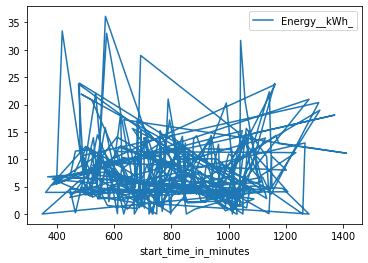

In [169]:
# plot for month of february 2018 / nearly 308 rows
df_feb_2018.plot(x='start_time_in_minutes', y='Energy__kWh_', label='Energy__kWh_') 

In [170]:
# gathering all records for july
df_july=newdf[newdf['Start_date_month'] ==7]

In [171]:
# gathering all records for july 2018
df_july_2018=df_july[df_july['Start_date_year'] ==2018]

In [172]:
df_july_2018

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,binned_energy,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,start_time_in_minutes,Charge_end_timestamp,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,charge_duration_in_minutes,binned_duration_in_minutes
2414,2415,6.636,2.787,0.833,"(5.0, 10.0]",2018-07-09 17:31:00,7,9,2018,0,17:31:00,1051,2018-07-09 19:19:00,7.0,9.0,2018.0,0.0,19:19:00,108.0,"(100.0, 150.0]"
2442,2443,5.830,2.449,0.732,"(5.0, 10.0]",2018-07-06 17:40:00,7,6,2018,4,17:40:00,1060,2018-07-06 19:51:00,7.0,6.0,2018.0,4.0,19:51:00,131.0,"(100.0, 150.0]"
2454,2455,2.689,1.129,0.337,"(0.0, 5.0]",2018-07-03 11:30:00,7,3,2018,1,11:30:00,690,2018-07-03 13:04:00,7.0,3.0,2018.0,1.0,13:04:00,94.0,"(50.0, 100.0]"
2455,2456,0.000,0.000,0.000,NaN,2018-07-06 17:40:00,7,6,2018,4,17:40:00,1060,2018-07-06 17:42:00,7.0,6.0,2018.0,4.0,17:42:00,2.0,"(0.0, 50.0]"
2457,2458,2.540,1.067,0.319,"(0.0, 5.0]",2018-07-03 12:09:00,7,3,2018,1,12:09:00,729,2018-07-03 12:34:00,7.0,3.0,2018.0,1.0,12:34:00,25.0,"(0.0, 50.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3196,3.259,1.369,0.409,"(0.0, 5.0]",2018-07-15 10:58:00,7,15,2018,6,10:58:00,658,2018-07-15 13:24:00,7.0,15.0,2018.0,6.0,13:24:00,146.0,"(100.0, 150.0]"
3196,3197,0.000,0.000,0.000,NaN,2018-07-15 10:58:00,7,15,2018,6,10:58:00,658,2018-07-15 10:58:00,7.0,15.0,2018.0,6.0,10:58:00,0.0,NaN
3197,3198,1.917,0.805,0.241,"(0.0, 5.0]",2018-07-15 12:45:00,7,15,2018,6,12:45:00,765,2018-07-15 13:05:00,7.0,15.0,2018.0,6.0,13:05:00,20.0,"(0.0, 50.0]"
3198,3199,5.834,2.450,0.732,"(5.0, 10.0]",2018-07-15 12:51:00,7,15,2018,6,12:51:00,771,2018-07-15 13:50:00,7.0,15.0,2018.0,6.0,13:50:00,59.0,"(50.0, 100.0]"


<AxesSubplot:xlabel='start_time_in_minutes'>

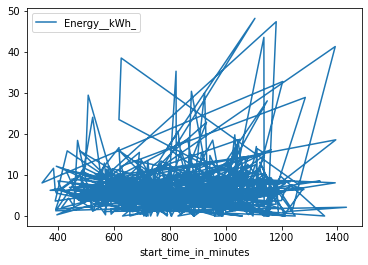

In [173]:
# plot for month of july 2018 / nearly 531 rows
df_july_2018.plot(x='start_time_in_minutes', y='Energy__kWh_', label='Energy__kWh_') 